In [1]:
from scipy.io import loadmat
data = loadmat('mnist-original.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 '__globals__': [],
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}

In [2]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'mldata_descr_ordering', 'data', 'label'])

In [3]:
y = data['label'].ravel()
# y.shape
y

array([0., 0., 0., ..., 9., 9., 9.])

In [4]:
data['data']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [5]:
import pandas as pd
X = pd.DataFrame(data['data'].T)
X
# print(X.shape)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


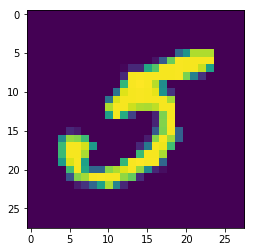

In [6]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
some_digit = np.array(X.iloc[36000,])
some_digit_img = some_digit.reshape(28,28)
plt.imshow(some_digit_img, interpolation='nearest')
# plt.axis('off')
plt.show()

In [7]:
y[36000]

5.0

In [8]:
X_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
type(y_train)

numpy.ndarray

In [9]:
import numpy as np
shuffle_idx = np.random.permutation(60000)
X_train, y_train = X_train.iloc[shuffle_idx], y_train[shuffle_idx]
X_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
13693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40515,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=1)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=1, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
sgd_clf.predict([some_digit])

array([False])

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# 分层采样，分成3份
skfolds = StratifiedKFold(n_splits=3)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    # 采用上面的模型的clone版本
    clone_clf = clone(sgd_clf)
    
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.96225
0.95935
0.95245


In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.96225, 0.95935, 0.95245])

In [14]:
from sklearn.base import BaseEstimator
class not5(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool) # 返回全部不是5
not5_clf = not5()
cross_val_score(not5_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.9109 , 0.90965, 0.9084 ])

In [15]:
# 混淆矩阵
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53212,  1367],
       [ 1152,  4269]], dtype=int64)

In [17]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # 0.7002607761926676
recall_score(y_train_5, y_train_pred) # 0.8420955543257701

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred) # 0.7646566164154103

0.7721805191281541

In [18]:
help(SGDClassifier.decision_function)

Help on function decision_function in module sklearn.linear_model._base:

decision_function(self, X)
    Predict confidence scores for samples.
    
    The confidence score for a sample is the signed distance of that
    sample to the hyperplane.
    
    Parameters
    ----------
    X : array_like or sparse matrix, shape (n_samples, n_features)
        Samples.
    
    Returns
    -------
    array, shape=(n_samples,) if n_classes == 2 else (n_samples, n_classes)
        Confidence scores per (sample, class) combination. In the binary
        case, confidence score for self.classes_[1] where >0 means this
        class would be predicted.



In [19]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-605.04248367])

In [20]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [21]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,
                            method='decision_function')

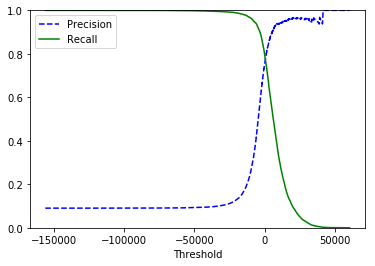

In [22]:
from sklearn.metrics import precision_recall_curve
# help(precision_recall_curve)
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="best")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

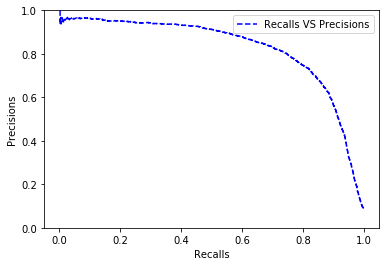

In [23]:
def plot_precision_recall(precisions, recalls):
    plt.plot(recalls[:-1], precisions[:-1], "b--", label="Recalls VS Precisions")
    plt.xlabel("Recalls")
    plt.ylabel("Precisions")
    plt.legend(loc="best")
    plt.ylim([0, 1])
plot_precision_recall(precisions, recalls)
plt.show()

In [24]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.9)]
y_train_pred_90 = (y_scores >= threshold_90_precision)
precision_score(y_train_5, y_train_pred_90) # 0.9000318369945877
recall_score(y_train_5, y_train_pred_90)  # 0.5214904999077661

0.5366168603578676

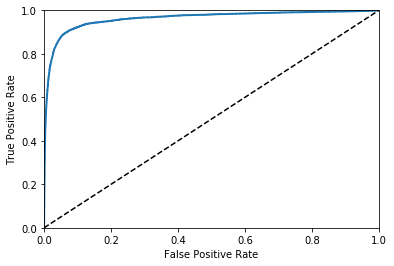

In [25]:
from sklearn.metrics import roc_curve
# help(roc_curve)
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [26]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9622974584152236

In [27]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [28]:
help(RandomForestClassifier.predict_proba)
#  Returns
#     -------
#     p : array of shape (n_samples, n_classes), or a list of n_outputs
#         such arrays if n_outputs > 1.
#         The class probabilities of the input samples. The order of the
#         classes corresponds to that in the attribute :term:`classes_`.
y_probas_forest

Help on function predict_proba in module sklearn.ensemble._forest:

predict_proba(self, X)
    Predict class probabilities for X.
    
    The predicted class probabilities of an input sample are computed as
    the mean predicted class probabilities of the trees in the forest.
    The class probability of a single tree is the fraction of samples of
    the same class in a leaf.
    
    Parameters
    ----------
    X : array-like or sparse matrix of shape (n_samples, n_features)
        The input samples. Internally, its dtype will be converted to
        ``dtype=np.float32``. If a sparse matrix is provided, it will be
        converted into a sparse ``csr_matrix``.
    
    Returns
    -------
    p : array of shape (n_samples, n_classes), or a list of n_outputs
        such arrays if n_outputs > 1.
        The class probabilities of the input samples. The order of the
        classes corresponds to that in the attribute :term:`classes_`.



array([[1.  , 0.  ],
       [0.94, 0.06],
       [0.99, 0.01],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.14, 0.86]])

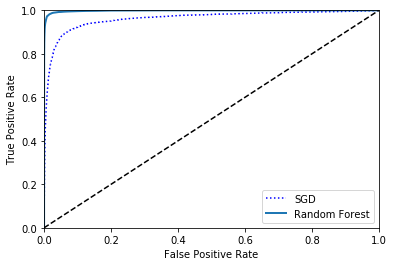

In [29]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="best")
plt.show()

In [30]:
roc_auc_score(y_train_5, y_scores_forest) # 0.9982577037448723

0.998326275451401

In [31]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([5.])

In [32]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-10459.91290014, -25411.57140752, -12005.97198146,
         -2015.16281777, -30566.09289542,   -545.81635241,
        -24457.99165882, -14550.22890849, -10369.50724199,
        -15912.66193846]])

In [33]:
np.argmax(some_digit_scores) # 5
sgd_clf.classes_ # array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])
sgd_clf.classes_[5] # 5.0

5.0

In [34]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=1))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5.])

In [35]:
len(ovo_clf.estimators_)

45

In [36]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit]) # array([5.])

array([5.])

In [46]:
forest_clf.predict_proba([some_digit])
# help(cross_val_score)

array([[0.04, 0.  , 0.02, 0.05, 0.  , 0.88, 0.  , 0.  , 0.01, 0.  ]])

In [43]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

TypeError: cross_val_score() got an unexpected keyword argument 'max_iter'

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy',max_iter=100000)

TypeError: cross_val_score() got an unexpected keyword argument 'max_iter'

In [48]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mat = confusion_matrix(y_train, y_train_pred)
conf_mat

array([[5777,    0,   24,   21,   10,   19,   22,    4,   36,   10],
       [   3, 6478,   48,   46,   12,   25,   12,   14,   83,   21],
       [  91,   71, 5088,  235,   38,   40,   77,   64,  235,   19],
       [  56,   26,  185, 5376,    6,  160,   32,   62,  143,   85],
       [  41,   34,   69,   49, 5055,   36,   64,   40,  174,  280],
       [  95,   27,   66,  430,   65, 4243,   98,   23,  275,   99],
       [ 101,   20,   82,   14,   31,   98, 5501,    3,   58,   10],
       [  38,   27,   88,   79,   47,   21,    5, 5650,   33,  277],
       [  61,  130,   96,  469,   31,  240,   40,   39, 4587,  158],
       [  51,   34,   50,  250,  141,   80,    1,  330,  289, 4723]],
      dtype=int64)

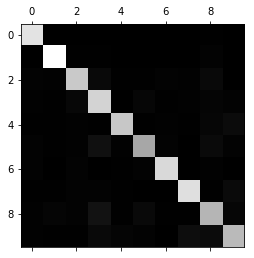

In [49]:
plt.matshow(conf_mat, cmap=plt.cm.gray)

[[5923]
 [6742]
 [5958]
 [6131]
 [5842]
 [5421]
 [5918]
 [6265]
 [5851]
 [5949]]


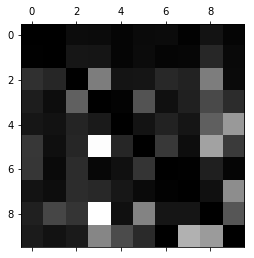

In [60]:
row_sums = conf_mat.sum(axis=1, keepdims=True)
print(row_sums)
norm_conf_mat = conf_mat/row_sums
np.fill_diagonal(norm_conf_mat, 0)
plt.matshow(norm_conf_mat, cmap=plt.cm.gray)
plt.show()

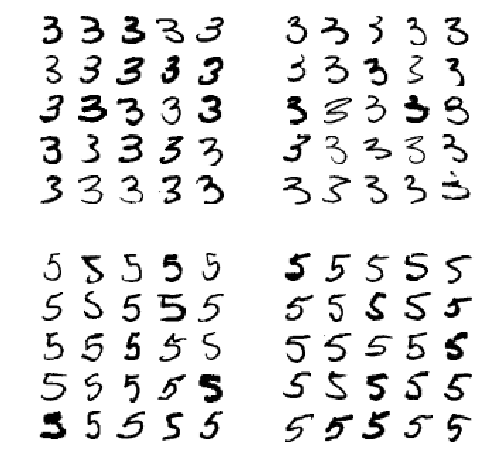

In [70]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")

cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(np.array(X_aa[:25]), images_per_row=5)
plt.subplot(222); plot_digits(np.array(X_ab[:25]), images_per_row=5)
plt.subplot(223); plot_digits(np.array(X_ba[:25]), images_per_row=5)
plt.subplot(224); plot_digits(np.array(X_bb[:25]), images_per_row=5)
plt.show()

In [71]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [72]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

In [ ]:
f1_score(y_train, y_train_knn_pred, average="macro")